# Import the necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns

# Load the data

In [2]:
train_X = pickle.load(open('/kaggle/input/preprocesseddata/train_X.pkl', 'rb'))
train_y = pickle.load(open('/kaggle/input/preprocesseddata/train_y.pkl', 'rb'))

test_X = pickle.load(open('/kaggle/input/preprocesseddata/test_X.pkl', 'rb'))
test_y = pickle.load(open('/kaggle/input/preprocesseddata/test_y.pkl', 'rb'))

In [3]:
print(f'shape of train_X: {train_X.shape}')
print(f'shape of train_y: {train_y.shape}')
print(f'shape of test_X: {test_X.shape}')
print(f'shape of test_y: {test_y.shape}')

shape of train_X: (22500, 100, 100, 3)
shape of train_y: (22500,)
shape of test_X: (2500, 100, 100, 3)
shape of test_y: (2500,)


In [3]:
IMG_SIZE = 100
COLOR_CHANNELS = 3

# Plot some images

training images

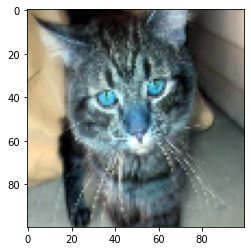

In [5]:
plt.imshow(train_X[0])

In [6]:
train_y[0]

0

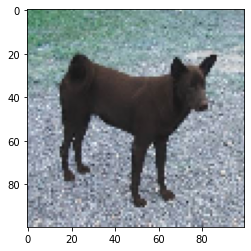

In [7]:
plt.imshow(train_X[3])

In [8]:
train_y[3]

1

Validation images

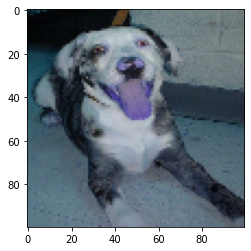

In [9]:
plt.imshow(test_X[0])

In [10]:
test_y[0]

1

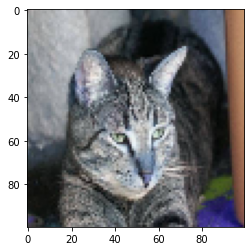

In [11]:
plt.imshow(test_X[3])

In [12]:
test_y[3]

0

# Functions

In [4]:
def plot_training_and_validation_loss(history_model): 
    loss_model = history_model.history['loss']
    val_loss_model = history_model.history['val_loss']
    epochs = range(1, len(loss_model) + 1)
    plt.plot(epochs, loss_model, color='green', label='Training loss')
    plt.plot(epochs, val_loss_model, color='blue', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    
def plot_training_and_validation_accuracy(history_model): 
    accuracy_model = history_model.history['accuracy']
    val_accuracy_model = history_model.history['val_accuracy']
    epochs = range(1, len(accuracy_model) + 1)
    plt.plot(epochs, accuracy_model, color='green', label='Training accuracy')
    plt.plot(epochs, val_accuracy_model, color='blue', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    

def train_model(model, no_epochs, batch_size_value, train_X, train_y, test_X, test_y):
    #compile the model
    model.compile(optimizer = 'adam', 
                 loss = 'binary_crossentropy',
                 metrics = ['accuracy'])
    
    #fit the model and evaluate it
    history_model = model.fit(train_X, train_y, validation_data = (test_X, test_y),
                          epochs = no_epochs, batch_size = batch_size_value)
    
    return history_model


def plot_confusion_matrix(model, test_y, predicted_values):
    conf_matrix = confusion_matrix(test_y, predicted_values)
    sns.heatmap(conf_matrix/np.sum(conf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

# Create the CNN

I'll start with a simple model and I'll continue to enhance it.

The convolutional layer extracts the features from images.

The pooling layer reduces the spatial volume of input image after convolution.

In [14]:
model_one = Sequential([Conv2D(32, 3, activation = 'relu', input_shape = (IMG_SIZE, IMG_SIZE, COLOR_CHANNELS)),
                        Conv2D(64, 3, activation = 'relu'),
                        Flatten(),
                        Dense(1, activation = 'sigmoid')
])

# Fit the model and evaluate it

In [15]:
history_model_one = train_model(model_one, 20, 32, train_X, train_y, test_X, test_y)

Epoch 1/20
704/704 [==============================] - 9s 13ms/step - loss: 0.6892 - accuracy: 0.6264 - val_loss: 0.5952 - val_accuracy: 0.6940
Epoch 2/20
704/704 [==============================] - 9s 13ms/step - loss: 0.5426 - accuracy: 0.7284 - val_loss: 0.5589 - val_accuracy: 0.7164
Epoch 3/20
704/704 [==============================] - 9s 13ms/step - loss: 0.4038 - accuracy: 0.8162 - val_loss: 0.5329 - val_accuracy: 0.7544
Epoch 4/20
704/704 [==============================] - 9s 12ms/step - loss: 0.2481 - accuracy: 0.8966 - val_loss: 0.6303 - val_accuracy: 0.7456
Epoch 5/20
704/704 [==============================] - 9s 12ms/step - loss: 0.1132 - accuracy: 0.9609 - val_loss: 0.8287 - val_accuracy: 0.7408
Epoch 6/20
704/704 [==============================] - 9s 13ms/step - loss: 0.0411 - accuracy: 0.9889 - val_loss: 1.0177 - val_accuracy: 0.7324
Epoch 7/20
704/704 [==============================] - 9s 13ms/step - loss: 0.0209 - accuracy: 0.9952 - val_loss: 1.2434 - val_accuracy: 0.7276

In [16]:
model_one.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 96, 96, 64)        18496     
_________________________________________________________________
flatten (Flatten)            (None, 589824)            0         
_________________________________________________________________
dense (Dense)                (None, 1)                 589825    
Total params: 609,217
Trainable params: 609,217
Non-trainable params: 0
_________________________________________________________________


# **Plot training and validation loss**

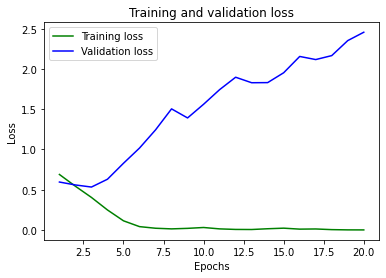

In [17]:
plot_training_and_validation_loss(history_model_one)

# Plot training and validation accuracy

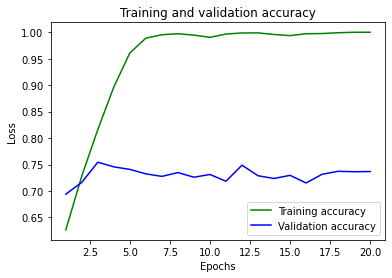

In [18]:
plot_training_and_validation_accuracy(history_model_one)

As we can see from the 2 above plots, this model is not that good. It overfitted.

 # Predict and plot the confusion matrix

In [19]:
rounded_pred_model_one = model_one.predict_classes(test_X, batch_size = 32, verbose = 0)

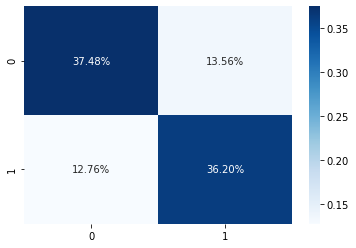

In [20]:
plot_confusion_matrix(model_one, test_y, rounded_pred_model_one)

# *** Model 2

I added a max pooling layer in order to reduce the spatial volume of the input data after convolution. 
I also added a dropout to prevent the overfitting.

In [5]:
model_two = Sequential()

model_two.add(Conv2D(32, 3, activation = 'relu', input_shape = (IMG_SIZE, IMG_SIZE, COLOR_CHANNELS)))
model_two.add(MaxPooling2D(2, 2))

model_two.add(Conv2D(64, 3, activation = 'relu'))
model_two.add(MaxPooling2D(2, 2))
model_two.add(Dropout(0.5))

model_two.add(Flatten())
model_two.add(Dense(1, activation = 'sigmoid'))

In [6]:
history_model_two = train_model(model_two, 20, 32, train_X, train_y, test_X, test_y)

Epoch 1/20
704/704 [==============================] - 6s 9ms/step - loss: 0.5780 - accuracy: 0.6907 - val_loss: 0.5498 - val_accuracy: 0.7200
Epoch 2/20
704/704 [==============================] - 5s 8ms/step - loss: 0.4791 - accuracy: 0.7707 - val_loss: 0.4574 - val_accuracy: 0.7920
Epoch 3/20
704/704 [==============================] - 6s 8ms/step - loss: 0.4394 - accuracy: 0.7952 - val_loss: 0.4694 - val_accuracy: 0.7800
Epoch 4/20
704/704 [==============================] - 6s 8ms/step - loss: 0.4077 - accuracy: 0.8147 - val_loss: 0.4373 - val_accuracy: 0.8080
Epoch 5/20
704/704 [==============================] - 5s 8ms/step - loss: 0.3752 - accuracy: 0.8335 - val_loss: 0.4016 - val_accuracy: 0.8216
Epoch 6/20
704/704 [==============================] - 5s 8ms/step - loss: 0.3545 - accuracy: 0.8417 - val_loss: 0.4391 - val_accuracy: 0.8032
Epoch 7/20
704/704 [==============================] - 6s 8ms/step - loss: 0.3291 - accuracy: 0.8581 - val_loss: 0.3942 - val_accuracy: 0.8280
Epoch 

In [7]:
model_two.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 23, 23, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 33856)             0         
_________________________________________________________________
dense (Dense)                (None, 1)                 3

# Plot training and validation losses

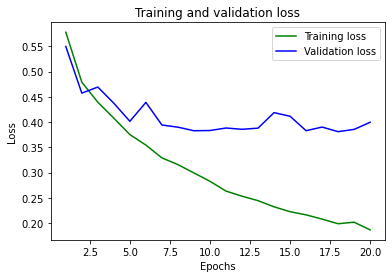

In [8]:
plot_training_and_validation_loss(history_model_two)

# Plot training and validation accuracies

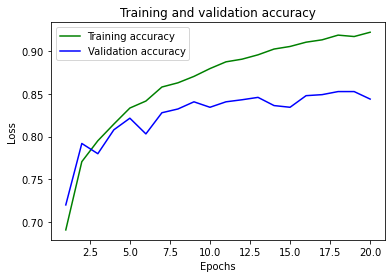

In [9]:
plot_training_and_validation_accuracy(history_model_two)

This model seems to be better than the previous one, but I'll still try to find a better model.

# Predict and vizualize the confusion matrix

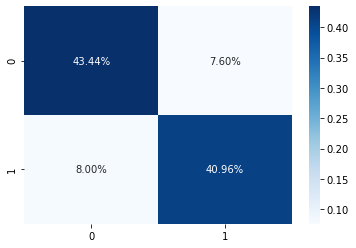

In [10]:
rounded_pred_model_two = model_two.predict_classes(test_X, batch_size = 32, verbose = 0)
plot_confusion_matrix(model_two, test_y, rounded_pred_model_two)

# *** Model 3

After the max pooling layer, I am going to cut out 50% of the connections, so as the model trains, 50% of the connections are going to be dropped out and the epochs will be more effective because the connections will be dropped out randomly so each of the individual connections will have to generalize more and be able to handle more variation. This technique will help me simulate more training examples.

In [6]:
model_three = Sequential()

model_three.add(Conv2D(32, 3, activation = 'relu', input_shape = (IMG_SIZE, IMG_SIZE, COLOR_CHANNELS)))
model_three.add(MaxPooling2D(2, 2))
model_three.add(Dropout(0.5))

model_three.add(Conv2D(64, 3, activation = 'relu'))
model_three.add(MaxPooling2D(2, 2))
model_three.add(Dropout(0.5))

model_three.add(Conv2D(128, 3, activation = 'relu'))
model_three.add(MaxPooling2D(2, 2))
model_three.add(Dropout(0.5))

model_three.add(Flatten())
model_three.add(Dense(1, activation = 'sigmoid'))

In [7]:
history_model_three = train_model(model_three, 40, 32, train_X, train_y, test_X, test_y)

Epoch 1/40
704/704 [==============================] - 7s 10ms/step - loss: 0.6210 - accuracy: 0.6403 - val_loss: 0.5685 - val_accuracy: 0.6976
Epoch 2/40
704/704 [==============================] - 6s 9ms/step - loss: 0.5470 - accuracy: 0.7207 - val_loss: 0.5386 - val_accuracy: 0.7312
Epoch 3/40
704/704 [==============================] - 7s 9ms/step - loss: 0.5104 - accuracy: 0.7481 - val_loss: 0.5728 - val_accuracy: 0.6808
Epoch 4/40
704/704 [==============================] - 6s 9ms/step - loss: 0.4860 - accuracy: 0.7650 - val_loss: 0.4731 - val_accuracy: 0.7804
Epoch 5/40
704/704 [==============================] - 6s 9ms/step - loss: 0.4531 - accuracy: 0.7857 - val_loss: 0.4962 - val_accuracy: 0.7616
Epoch 6/40
704/704 [==============================] - 6s 9ms/step - loss: 0.4384 - accuracy: 0.7945 - val_loss: 0.4285 - val_accuracy: 0.8072
Epoch 7/40
704/704 [==============================] - 6s 9ms/step - loss: 0.4227 - accuracy: 0.8071 - val_loss: 0.4572 - val_accuracy: 0.7828
Epoch

# Plot training and validation losses

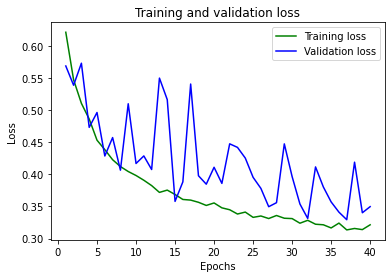

In [8]:
plot_training_and_validation_loss(history_model_three)

# Plot training and validation accuracy

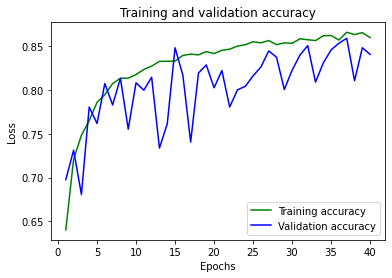

In [9]:
plot_training_and_validation_accuracy(history_model_three)

# Predict and vizualize the confusion matrix

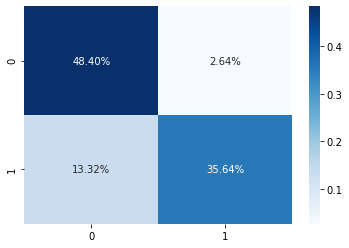

In [10]:
rounded_pred_model_three = model_three.predict_classes(test_X, batch_size = 32, verbose = 0)
plot_confusion_matrix(model_three, test_y, rounded_pred_model_three)

# *** Model 4

I took the previous model and I changed the dropout for the first 2 layers. I also increased the number of epochs.

In [5]:
model_four = Sequential()

model_four.add(Conv2D(32, 3, activation = 'relu', input_shape = (IMG_SIZE, IMG_SIZE, COLOR_CHANNELS)))
model_four.add(MaxPooling2D(2, 2))
model_four.add(Dropout(0.2))

model_four.add(Conv2D(64, 3, activation = 'relu'))
model_four.add(MaxPooling2D(2, 2))
model_four.add(Dropout(0.2))

model_four.add(Conv2D(128, 3, activation = 'relu'))
model_four.add(MaxPooling2D(2, 2))
model_four.add(Dropout(0.5))

model_four.add(Flatten())
model_four.add(Dense(1, activation = 'sigmoid'))

In [6]:
history_model_four = train_model(model_four, 100, 32, train_X, train_y, test_X, test_y)

Epoch 1/100
704/704 [==============================] - 7s 10ms/step - loss: 0.6462 - accuracy: 0.5998 - val_loss: 0.5935 - val_accuracy: 0.6720
Epoch 2/100
704/704 [==============================] - 6s 9ms/step - loss: 0.5384 - accuracy: 0.7251 - val_loss: 0.5022 - val_accuracy: 0.7564
Epoch 3/100
704/704 [==============================] - 6s 9ms/step - loss: 0.4742 - accuracy: 0.7731 - val_loss: 0.4255 - val_accuracy: 0.8052
Epoch 4/100
704/704 [==============================] - 7s 10ms/step - loss: 0.4190 - accuracy: 0.8054 - val_loss: 0.3833 - val_accuracy: 0.8272
Epoch 5/100
704/704 [==============================] - 6s 9ms/step - loss: 0.3939 - accuracy: 0.8234 - val_loss: 0.3688 - val_accuracy: 0.8380
Epoch 6/100
704/704 [==============================] - 6s 9ms/step - loss: 0.3645 - accuracy: 0.8387 - val_loss: 0.3719 - val_accuracy: 0.8324
Epoch 7/100
704/704 [==============================] - 6s 9ms/step - loss: 0.3435 - accuracy: 0.8516 - val_loss: 0.3218 - val_accuracy: 0.86

Epoch 58/100
704/704 [==============================] - 6s 9ms/step - loss: 0.1371 - accuracy: 0.9463 - val_loss: 0.3286 - val_accuracy: 0.8872
Epoch 59/100
704/704 [==============================] - 6s 9ms/step - loss: 0.1425 - accuracy: 0.9442 - val_loss: 0.2431 - val_accuracy: 0.9072
Epoch 60/100
704/704 [==============================] - 6s 9ms/step - loss: 0.1468 - accuracy: 0.9430 - val_loss: 0.2374 - val_accuracy: 0.9108
Epoch 61/100
704/704 [==============================] - 6s 9ms/step - loss: 0.1501 - accuracy: 0.9412 - val_loss: 0.2435 - val_accuracy: 0.9164
Epoch 62/100
704/704 [==============================] - 6s 9ms/step - loss: 0.1452 - accuracy: 0.9448 - val_loss: 0.2379 - val_accuracy: 0.9152
Epoch 63/100
704/704 [==============================] - 6s 9ms/step - loss: 0.1467 - accuracy: 0.9409 - val_loss: 0.2338 - val_accuracy: 0.9088
Epoch 64/100
704/704 [==============================] - 6s 9ms/step - loss: 0.1458 - accuracy: 0.9403 - val_loss: 0.2411 - val_accuracy:

# Plot the training and validation loss values

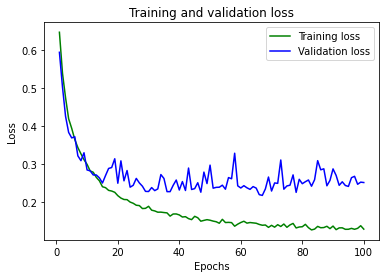

In [7]:
plot_training_and_validation_loss(history_model_four)

# Plot the training and validation accuracy values

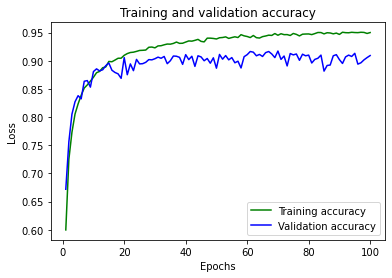

In [8]:
plot_training_and_validation_accuracy(history_model_four)

# Predict

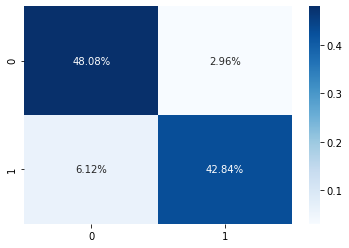

In [9]:
rounded_pred_model_four = model_four.predict_classes(test_X, batch_size = 32, verbose = 0)
plot_confusion_matrix(model_four, test_y, rounded_pred_model_four)

In [10]:
rounded_pred_model_four

array([[1],
       [0],
       [1],
       ...,
       [1],
       [1],
       [1]], dtype=int32)

This seems the best model so far. 

# *** Model 5

I took the previous model and I added another layer.

In [5]:
model_five = Sequential()

model_five.add(Conv2D(32, 3, activation = 'relu', input_shape = (IMG_SIZE, IMG_SIZE, COLOR_CHANNELS)))
model_five.add(MaxPooling2D(2, 2))
model_five.add(Dropout(0.2))

model_five.add(Conv2D(64, 3, activation = 'relu'))
model_five.add(MaxPooling2D(2, 2))
model_five.add(Dropout(0.2))

model_five.add(Conv2D(128, 3, activation = 'relu'))
model_five.add(MaxPooling2D(2, 2))
model_five.add(Dropout(0.2))

model_five.add(Conv2D(128, 3, activation = 'relu'))
model_five.add(MaxPooling2D(2, 2))
model_five.add(Dropout(0.5))

model_five.add(Flatten())
model_five.add(Dense(1, activation = 'sigmoid'))

In [6]:
history_model_five = train_model(model_five, 100, 32, train_X, train_y, test_X, test_y)

Epoch 1/100
704/704 [==============================] - 8s 11ms/step - loss: 0.6290 - accuracy: 0.6302 - val_loss: 0.5440 - val_accuracy: 0.7332
Epoch 2/100
704/704 [==============================] - 6s 9ms/step - loss: 0.5320 - accuracy: 0.7301 - val_loss: 0.5282 - val_accuracy: 0.7344
Epoch 3/100
704/704 [==============================] - 6s 9ms/step - loss: 0.4581 - accuracy: 0.7864 - val_loss: 0.4740 - val_accuracy: 0.7724
Epoch 4/100
704/704 [==============================] - 6s 9ms/step - loss: 0.4003 - accuracy: 0.8179 - val_loss: 0.3465 - val_accuracy: 0.8560
Epoch 5/100
704/704 [==============================] - 6s 9ms/step - loss: 0.3557 - accuracy: 0.8421 - val_loss: 0.2931 - val_accuracy: 0.8712
Epoch 6/100
704/704 [==============================] - 7s 9ms/step - loss: 0.3243 - accuracy: 0.8593 - val_loss: 0.2886 - val_accuracy: 0.8748
Epoch 7/100
704/704 [==============================] - 7s 9ms/step - loss: 0.2952 - accuracy: 0.8750 - val_loss: 0.2557 - val_accuracy: 0.890

Epoch 58/100
704/704 [==============================] - 6s 9ms/step - loss: 0.1172 - accuracy: 0.9544 - val_loss: 0.1993 - val_accuracy: 0.9312
Epoch 59/100
704/704 [==============================] - 6s 9ms/step - loss: 0.1107 - accuracy: 0.9566 - val_loss: 0.1874 - val_accuracy: 0.9292
Epoch 60/100
704/704 [==============================] - 7s 9ms/step - loss: 0.1261 - accuracy: 0.9483 - val_loss: 0.1863 - val_accuracy: 0.9248
Epoch 61/100
704/704 [==============================] - 7s 9ms/step - loss: 0.1131 - accuracy: 0.9556 - val_loss: 0.1751 - val_accuracy: 0.9272
Epoch 62/100
704/704 [==============================] - 6s 9ms/step - loss: 0.1102 - accuracy: 0.9572 - val_loss: 0.1965 - val_accuracy: 0.9288
Epoch 63/100
704/704 [==============================] - 6s 9ms/step - loss: 0.1179 - accuracy: 0.9538 - val_loss: 0.1897 - val_accuracy: 0.9268
Epoch 64/100
704/704 [==============================] - 6s 9ms/step - loss: 0.1139 - accuracy: 0.9542 - val_loss: 0.2027 - val_accuracy:

In [7]:
model_five.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 128)       7

# Plot training and validation loss values

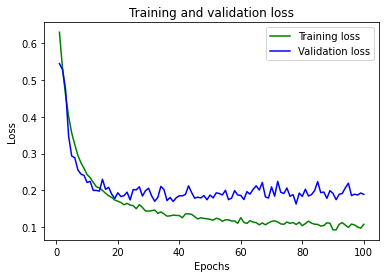

In [8]:
plot_training_and_validation_loss(history_model_five)

# Plot training and validation accuracy values

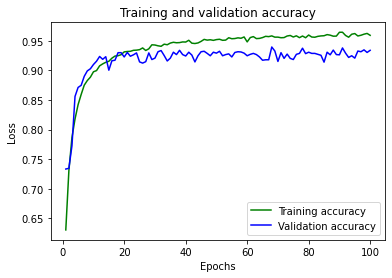

In [9]:
plot_training_and_validation_accuracy(history_model_five)

# Predict and plot the confusion matrix

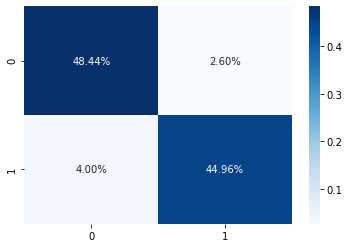

In [10]:
rounded_pred_model_five = model_five.predict_classes(test_X, batch_size = 32, verbose = 0)
plot_confusion_matrix(model_five, test_y, rounded_pred_model_five)

In [18]:
for i in range(0, 20):
    print(f'predicted:{rounded_pred_model_five[i]}\t actual: {test_y[i]}\n')

predicted:[1]	 actual: 1

predicted:[0]	 actual: 0

predicted:[1]	 actual: 1

predicted:[0]	 actual: 0

predicted:[0]	 actual: 0

predicted:[1]	 actual: 1

predicted:[0]	 actual: 0

predicted:[0]	 actual: 0

predicted:[1]	 actual: 1

predicted:[0]	 actual: 1

predicted:[1]	 actual: 1

predicted:[0]	 actual: 1

predicted:[0]	 actual: 0

predicted:[1]	 actual: 1

predicted:[0]	 actual: 0

predicted:[0]	 actual: 0

predicted:[0]	 actual: 0

predicted:[1]	 actual: 1

predicted:[1]	 actual: 1

predicted:[1]	 actual: 1

